In [144]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.style.use('seaborn-darkgrid')


# Preprocessing

In [145]:
with open("configs.json", "r") as f:
    configs = json.load(f)


In [146]:
filters = configs['filters']
features = configs['features']
label = configs['label']

In [147]:
pd.set_option("display.max_rows", 4)
pd.set_option("display.max_columns", None)

In [148]:
df = pd.read_csv('./data/wells.csv', error_bad_lines=False)

C:\Users\HZEYNALO\AppData\Local\Temp\ipykernel_26640\1976538036.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('./data/wells.csv', error_bad_lines=False)
C:\Users\HZEYNALO\AppData\Local\Temp\ipykernel_26640\1976538036.py:1: DtypeWarning: Columns (21,27,33,42,63,66,67,68,69,80,81,82,83,84,103,137,142,158,161,162,163) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/wells.csv', error_bad_lines=False)


In [149]:
df['Coring Days'].fillna(0.00, inplace=True)


In [150]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="ignore")

In [151]:
df["Re-Spud Well"].replace(' ', 'N', inplace=True)
df["Split Conductor"].replace(' ', 'N', inplace=True)

In [152]:
df[label[0]] = df['Dry Hole Days'] - (df['Coring Days'] + df['Total Logging Days'] + df['Total WOW During DH days'] + df['Total NPT During DH Days'])

C:\Users\HZEYNALO\AppData\Local\Temp\ipykernel_26640\2723414794.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[label[0]] = df['Dry Hole Days'] - (df['Coring Days'] + df['Total Logging Days'] + df['Total WOW During DH days'] + df['Total NPT During DH Days'])


In [153]:
for filter in filters:
    ## When we have filters
    if (len(filters[filter]) != 0) and (filters[filter][0] != None):
        df = df[df[filter].isin(filters[filter])]
    ## When we need to take null values
    if (len(filters[filter]) != 0) and (filters[filter][0] == None):
        df = df[df[filter].isna()]

 

In [154]:
df.sample(2)

,Data Type,Year,Country,Group,Operator,BU,Previous Operator Name,Region,Sub-Region,Formal Well Name,Common Well Name,Rig Contractor,Rig Name,RDI v2.1,REDD v2.0,RDI v3.1,REDD v3.1,Field / Basin / Area,Block Number,Platform Name / Land Well Pad Number,Offshore / Land,GOM API Well Number,Latitude,Decimal Latitude,Longitude,Decimal Longitude,Well Type,Play Type,High Pressure Well,High Temperature Well,Hole Type,Locator Well / Shallow Gas Pilot Hole,Multilateral,Multilateral Junction Type,Number of Laterals,No. Cont Geol S/T (added 2005),No. of Mech S/Tracks (added 2009),Re-Spud Well,Original Well Name,Rig Type,Dual Activity Rig,Drilling Method,Casing Drilling (added 2008),Owner Drilled,Drill Floor Elevation (m),Water Depth (m),Spud Depth (m),MTD (m),Drilled Interval (m),Unused conting'y GST len (m) (added 2005),Locator / Shallow gas unused length (m) (added 2005),Burial Depth (m),TVD (m),Salt,TVD Start Salt (m),TVD End Salt (m),Complex Well Path,Max Angle,Horizontal Sections (m),ERD,Complex Ratio,Final Bit Size (ins),Casing 1,Casing 2,Casing 3,Casing 4,Casing 5,Casing 6,Casing 7,Casing 8,Casing 9,Casing 10,Casing 11,Conductor Installed by Drilling Rig?,Split Conductor,Conductor Casing,Casing 1.1,Casing 2.1,Casing 3.1,Casing 4.1,Casing 5.1,Casing 6.1,Casing 7.1,Casing 8.1,Casing 9.1,Casing 10.1,Number of New Casings,Total Number of Casings,Number of Expandable Casings,Pressure Balance,Drilling Fluid,Mud Weight at TD (sg),Max. Mud Weight (sg),Cuttings Disposal Method,Coring Days,Coring Interval (m),Logging Days Not TD,Logging Days at TD,Total Logging Days,Pilot Hole Enlarging Days,Pilot Hole Enlarged Interval (m),FEWD,Age of Deepest Reservoir,New Techniques,Mooring System,Days Spent Mooring / De-Mooring,WOW During Mooring / De-Mooring,Moor Days (2000-2017),De-Moor Days (2000-2017),Moor WOW (2000-2017),De-Moor WOW (2000-2017),Rig Move Time,Rig Move Within Field?,GST W/Stock Days,SR Pre-Spud Days,SR Pre-Spud Offline,SR included abandonment time?,Batch / Campaign Drilled,Spud Date,Dry Hole End Date,Dry Hole Days,Dry Hole Days Excl Core & Log,Dry Hole Days Excl Core,Productive Days,Metres per Dry Hole Day,Metres per Day Excl Core & Log,Metres per Day Excl Core,Dry Hole Days per 1000m,Dry Hole Days Excl Core & Log /1000m,Dry Hole Days Excl Core /1000m,No. Well Suspn,Suspn Ops Days,Days at Well Site,Well Status,PA/SU Days,Completion Days,Other Ops Days (After Dry Hole End Date),Date End of Well Ops,WOW Before De-Mooring,Dry Hole Cost (m USD),Dry Hole Cost / metre (USD),Dry Hole Cost / Day (k USD),Full Cost,Total Well Cost (m USD),Total Well Cost / metre (USD),Total Well Cost / Day (k USD),NPT Due to Rig Contractor,NPT Due to Service Company,NPT Due to Operator Problems,NPT Due to External Problems,NPT Due to Downhole Problems,Total WOW During DH days,Total NPT During DH Days,NPT Days / 1000m,WOW Days / 1000m,Productive Days / 1000m,NPT as % of Dry Hole Days,WOW as % of Dry Hole Days,Details of Major NPT Events,Further Details,Comments,Specimen Well Name,OCS-G Number or Unique Well ID,Date Un-Tight,Currency,Exchange Rate,Pre-Existing Casing,New Casings,Date Published,Last Updated,Net Productive Time
41837,Full,2010,Brazil Offshore,OGX,OGX,NaN,NaN,Americas,NaN,3-OGX-9D-RJS,Vesuvio Pilot,Diamond Offshore,Ocean Ambassador,28.0,15.1,41.0,21.7,Campos,BM-C-41,NaN,O,NaN,23 37 23S,-23.623,41 27 58W,-41.466,E,H,N,N,N,N,N,NaN,NaN,NaN,0.0,N,NaN,SS,N,AMT,NaN,1.0,NaN,137.0,163,2828,2665,0.0,0.0,2372.0,2535.0,N,0.0,0.0,N,39.0,0.0,NaN,1.12,8.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,N,30,13.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0.0,N,W,1.14,1.15,D,1.0,5.0,0.00,3.79,3.79,0.0,0.0,Y,TEoc,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,,,N,26-Feb-10,23-Mar-10,24.75,19.96,23.75,23.79,108,134.0,112,9.29,7.49,8.91,0.0,NaN,28.30,PP,2.0,NaN,NaN,NaN,NaN,15.47,5805.0,625.0,Y,17.14,6432.0,606.0,0.19,0.00,0.00,0.0,0.77,0.0,0.96,0.36,0.0,8.93,3.9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,USD,1.0,NaN,30 13.375,27-Jan-11,28-Apr-16,19.00
13122,Full,2015,Brazil Offshore,Pet

In [155]:
df[df['Net Productive Time'] < 0][['Dry Hole Days', 'Total Logging Days', 'Total NPT During DH Days', 'Total WOW During DH days', 'Coring Days', 'Net Productive Time']]

,Dry Hole Days,Total Logging Days,Total NPT During DH Days,Total WOW During DH days,Coring Days,Net Productive Time
708,57.4,32.50,21.56,0.00,6.88,-3.54
35930,203.9,22.71,82.12,2.21,101.42,-4.56


C:\Users\HZEYNALO\Anaconda3\envs\cost\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Net Productive Time'>

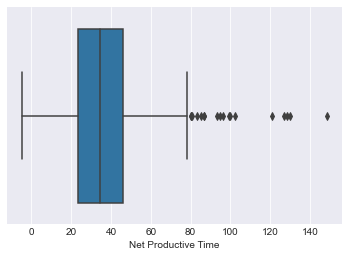

In [156]:
sns.boxplot(df['Net Productive Time'])

In [157]:
df = df[df['Net Productive Time'] >= 0]

In [158]:
df

,Data Type,Year,Country,Group,Operator,BU,Previous Operator Name,Region,Sub-Region,Formal Well Name,Common Well Name,Rig Contractor,Rig Name,RDI v2.1,REDD v2.0,RDI v3.1,REDD v3.1,Field / Basin / Area,Block Number,Platform Name / Land Well Pad Number,Offshore / Land,GOM API Well Number,Latitude,Decimal Latitude,Longitude,Decimal Longitude,Well Type,Play Type,High Pressure Well,High Temperature Well,Hole Type,Locator Well / Shallow Gas Pilot Hole,Multilateral,Multilateral Junction Type,Number of Laterals,No. Cont Geol S/T (added 2005),No. of Mech S/Tracks (added 2009),Re-Spud Well,Original Well Name,Rig Type,Dual Activity Rig,Drilling Method,Casing Drilling (added 2008),Owner Drilled,Drill Floor Elevation (m),Water Depth (m),Spud Depth (m),MTD (m),Drilled Interval (m),Unused conting'y GST len (m) (added 2005),Locator / Shallow gas unused length (m) (added 2005),Burial Depth (m),TVD (m),Salt,TVD Start Salt (m),TVD End Salt (m),Complex Well Path,Max Angle,Horizontal Sections (m),ERD,Complex Ratio,Final Bit Size (ins),Casing 1,Casing 2,Casing 3,Casing 4,Casing 5,Casing 6,Casing 7,Casing 8,Casing 9,Casing 10,Casing 11,Conductor Installed by Drilling Rig?,Split Conductor,Conductor Casing,Casing 1.1,Casing 2.1,Casing 3.1,Casing 4.1,Casing 5.1,Casing 6.1,Casing 7.1,Casing 8.1,Casing 9.1,Casing 10.1,Number of New Casings,Total Number of Casings,Number of Expandable Casings,Pressure Balance,Drilling Fluid,Mud Weight at TD (sg),Max. Mud Weight (sg),Cuttings Disposal Method,Coring Days,Coring Interval (m),Logging Days Not TD,Logging Days at TD,Total Logging Days,Pilot Hole Enlarging Days,Pilot Hole Enlarged Interval (m),FEWD,Age of Deepest Reservoir,New Techniques,Mooring System,Days Spent Mooring / De-Mooring,WOW During Mooring / De-Mooring,Moor Days (2000-2017),De-Moor Days (2000-2017),Moor WOW (2000-2017),De-Moor WOW (2000-2017),Rig Move Time,Rig Move Within Field?,GST W/Stock Days,SR Pre-Spud Days,SR Pre-Spud Offline,SR included abandonment time?,Batch / Campaign Drilled,Spud Date,Dry Hole End Date,Dry Hole Days,Dry Hole Days Excl Core & Log,Dry Hole Days Excl Core,Productive Days,Metres per Dry Hole Day,Metres per Day Excl Core & Log,Metres per Day Excl Core,Dry Hole Days per 1000m,Dry Hole Days Excl Core & Log /1000m,Dry Hole Days Excl Core /1000m,No. Well Suspn,Suspn Ops Days,Days at Well Site,Well Status,PA/SU Days,Completion Days,Other Ops Days (After Dry Hole End Date),Date End of Well Ops,WOW Before De-Mooring,Dry Hole Cost (m USD),Dry Hole Cost / metre (USD),Dry Hole Cost / Day (k USD),Full Cost,Total Well Cost (m USD),Total Well Cost / metre (USD),Total Well Cost / Day (k USD),NPT Due to Rig Contractor,NPT Due to Service Company,NPT Due to Operator Problems,NPT Due to External Problems,NPT Due to Downhole Problems,Total WOW During DH days,Total NPT During DH Days,NPT Days / 1000m,WOW Days / 1000m,Productive Days / 1000m,NPT as % of Dry Hole Days,WOW as % of Dry Hole Days,Details of Major NPT Events,Further Details,Comments,Specimen Well Name,OCS-G Number or Unique Well ID,Date Un-Tight,Currency,Exchange Rate,Pre-Existing Casing,New Casings,Date Published,Last Updated,Net Productive Time
31,Full,2021,Brazil Offshore,Petrobras,Petrobras,NaN,NaN,Americas,NaN,7-RO-173H-RJS,7-RO-173H-RJS,Ventura Petroleo,Carolina,51.0,24.7,90.0,43.3,Campos Mar,Roncador,NaN,O,NaN,21 57 29S,-21.958,39 46 15W,-39.771,D,H,N,N,N,N,N,NaN,NaN,0.0,0.0,N,NaN,DS,N,AT,NaN,1.0,NaN,1695.0,1727,4136,2409,0.0,0.0,1365.0,3092.0,N,0.0,0.0,,85.0,39.0,NaN,1.34,8.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,30,13.625,10.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,0.0,N,OW,1.07,1.44,D,0.0,0.0,0.0,0.00,0.00,NaN,0.0,,CLow,NaN,DP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,,,B,15-Feb-21,31-Mar-21,36.60,36.60,36.60,29.36,66,66.0,66,15.19,15.19,15.19,1.0,0.58,53.68,CO,NaN,14.31,NaN,15-Apr-21,NaN,18.03,7484.0,493.0,NaN,28.29,11743.0,527.0,3.99,1.52,0.92,0.00,0.00,0.81,6.43,2.67,0.34,12.19,17.6,2.2,NaN,Pre-spud: 2.2 days,NaN,NaN,NaN,NaN,USD,1.0,NaN,30 13.625 10.75,17-Jun-21,17-

# Data Exploration

In [159]:
df = df[features + label]

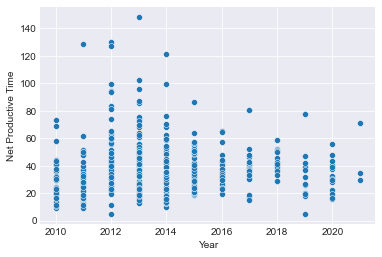

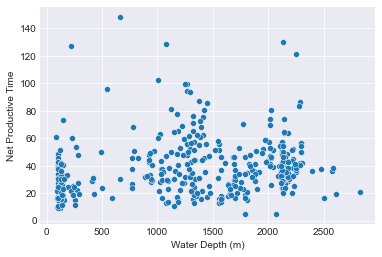

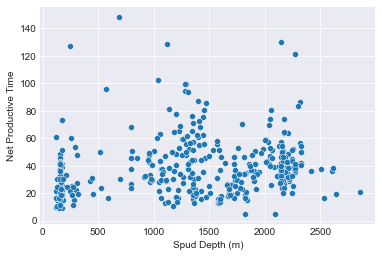

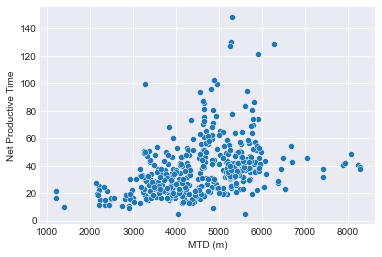

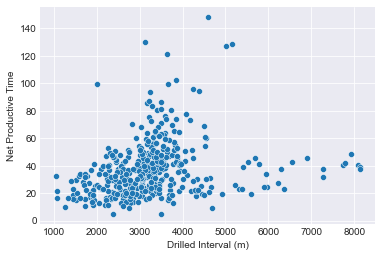

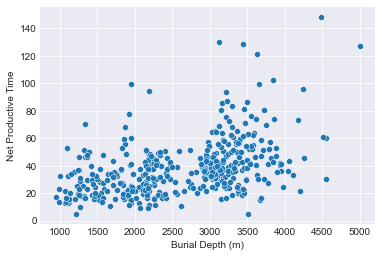

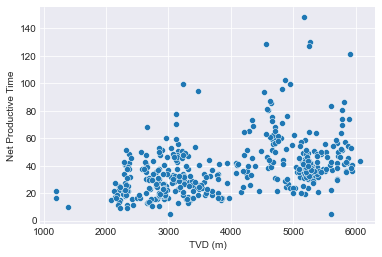

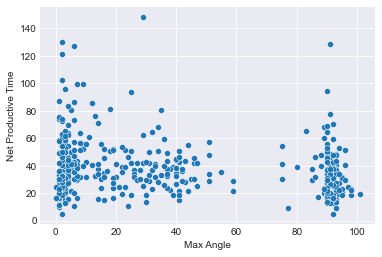

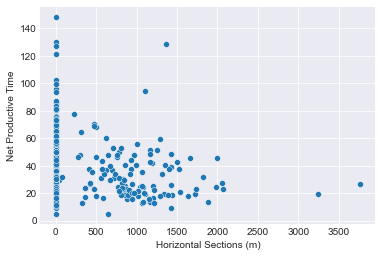

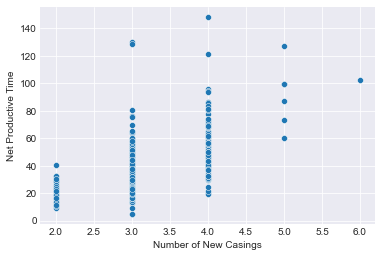

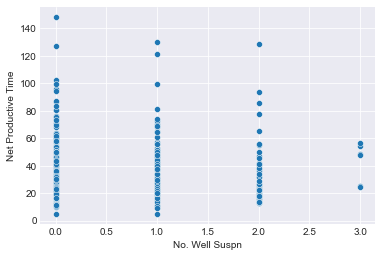

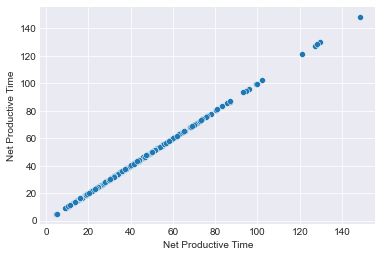

In [160]:
for num in df.select_dtypes(include="number").columns:
    sns.scatterplot(data=df, x=num, y='Net Productive Time')
    plt.show()

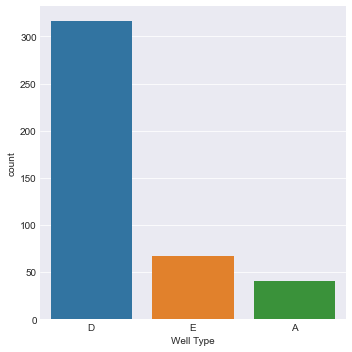

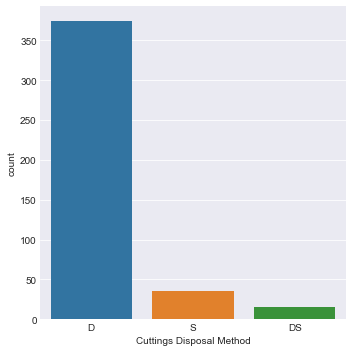

In [161]:
for cat in df.select_dtypes(include=object).columns:
    sns.catplot(x=cat, kind="count", data=df)

# ML functions

In [162]:
def nValue(df):
    for col in df.columns:
        print(f'{df[col].isnull().sum()} -  {col}')

In [163]:
def cont_and_cat(df):
    cats = df.select_dtypes(include=object)
    cont = df.select_dtypes(exclude=object)
    return [cont.columns.values, cats.columns.values]

In [164]:
nValue(df)

0 -  Well Type
0 -  Year
0 -  Water Depth (m)
0 -  Spud Depth (m)
0 -  MTD (m)
0 -  Drilled Interval (m)
0 -  Burial Depth (m)
0 -  TVD (m)
0 -  Max Angle
0 -  Horizontal Sections (m)
0 -  Number of New Casings
0 -  Cuttings Disposal Method
0 -  No. Well Suspn
0 -  Net Productive Time


In [165]:
df

,Well Type,Year,Water Depth (m),Spud Depth (m),MTD (m),Drilled Interval (m),Burial Depth (m),TVD (m),Max Angle,Horizontal Sections (m),Number of New Casings,Cuttings Disposal Method,No. Well Suspn,Net Productive Time
31,D,2021,1695.0,1727,4136,2409,1365.0,3092.0,85.0,39.0,3.0,D,1.0,29.36
34,D,2021,1322.0,1354,4863,3509,3464.0,4818.0,14.0,0.0,4.0,D,0.0,71.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41927,E,2010,1545.0,1572,4762,3191,3190.0,4762.0,1.0,0.0,3.0,D,0.0,58.36
41929,D,2010,1895.0,1922,4066,2144,986.0,2908.0,89.0,478.0,3.0,S,0.0,23.00


In [166]:
pd.get_dummies(df)

,Year,Water Depth (m),Spud Depth (m),MTD (m),Drilled Interval (m),Burial Depth (m),TVD (m),Max Angle,Horizontal Sections (m),Number of New Casings,No. Well Suspn,Net Productive Time,Well Type_A,Well Type_D,Well Type_E,Cuttings Disposal Method_D,Cuttings Disposal Method_DS,Cuttings Disposal Method_S
31,2021,1695.0,1727,4136,2409,1365.0,3092.0,85.0,39.0,3.0,1.0,29.36,0,1,0,1,0,0
34,2021,1322.0,1354,4863,3509,3464.0,4818.0,14.0,0.0,4.0,0.0,71.31,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41927,2010,1545.0,1572,4762,3191,3190.0,4762.0,1.0,0.0,3.0,0.0,58.36,0,0,1,1,0,0
41929,2010,1895.0,1922,4066,2144,986.0,2908.0,89.0,478.0,3.0,0.0,23.00,0,1,0,0,0,1


In [167]:
cats,cont

(array(['Well Type', 'Cuttings Disposal Method'], dtype=object),
 array(['Year', 'Water Depth (m)', 'Spud Depth (m)', 'MTD (m)',
        'Drilled Interval (m)', 'Burial Depth (m)', 'TVD (m)', 'Max Angle',
        'Horizontal Sections (m)', 'Number of New Casings',
        'No. Well Suspn', 'Net Productive Time'], dtype=object))

In [168]:
def labelEncoder(df, label, cats, one_hot_encoder_max_size):
    lvalues = df[label]
    df.drop(label, axis=1)
    for cat in cats:
        if df[cat].unique().shape[0] > one_hot_encoder_max_size:
            df[cat] = df[cat].astype("category").cat.codes
        else:
            df = pd.get_dummies(df, columns=[cat])
    df = df + lvalues
    return df

In [174]:
df = labelEncoder(df[features], label, cats, one_hot_encoder_max_size=5)

KeyError: "['Well Type', 'Cuttings Disposal Method'] not in index"

In [170]:
df[label] = 

,Year,Water Depth (m),Spud Depth (m),MTD (m),Drilled Interval (m),Burial Depth (m),TVD (m),Max Angle,Horizontal Sections (m),Number of New Casings,No. Well Suspn,Well Type_A,Well Type_D,Well Type_E,Cuttings Disposal Method_D,Cuttings Disposal Method_DS,Cuttings Disposal Method_S
31,2021,1695.0,1727,4136,2409,1365.0,3092.0,85.0,39.0,3.0,1.0,0,1,0,1,0,0
34,2021,1322.0,1354,4863,3509,3464.0,4818.0,14.0,0.0,4.0,0.0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41927,2010,1545.0,1572,4762,3191,3190.0,4762.0,1.0,0.0,3.0,0.0,0,0,1,1,0,0
41929,2010,1895.0,1922,4066,2144,986.0,2908.0,89.0,478.0,3.0,0.0,0,1,0,0,0,1


# ML
## Feature selection

In [173]:
X_train, X_test, y_train, y_test = train_test_split(
    df.select_dtypes(include="number").values, df[label], test_size=0.12, random_state=42)

KeyError: "None of [Index(['Net Productive Time'], dtype='object')] are in the [columns]"

In [ ]:
cont, cats = cont_and_cat(df)

## Model

### Catboost

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
cr = CatBoostRegressor(iterations=1000, learning_rate=0.1, cat_features=cats, one_hot_max_size=6, logging_level="Silent")
cr.fit(X_train, y_train)
cr.score(X_test, y_test)

-130.15431570547156

### SKLearn RF

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df[])

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

ValueError: could not convert string to float: 'D'